**Table of contents**<a id='toc0_'></a>    
- 1. [Pareto optimal bundles, $C$, given initial endownments](#toc1_)    
- 2. [Errors from $p_1 \in \mathcal{P}_1$](#toc2_)    
- 3. [Market clearing price](#toc3_)    
- 4. [Assignment 4](#toc4_)    
- 5. [Individual optimization](#toc5_)    
  - 5.1. [Optimizing under C](#toc5_1_)    
  - 5.2. [Optimizing over the infinite set between 0 and 1](#toc5_2_)    
- 6. [Assignment 6](#toc6_)    
- 7. [$W$](#toc7_)    
- 8. [Market equilibrium for each $\omega^A \in \mathcal{W}$](#toc8_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# Preliminaries

In [1]:
import matplotlib.pyplot as plt
from scipy import optimize 
import scipy.stats 

import numpy as np
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})


%load_ext autoreload
%autoreload 2

## 0. <a id='toc0_'></a>[ExchangeEconomy Class](#toc0_)

The ExchangeEconomy Class contains code relevant for solving most of the models in this assignment. For documentation of the code, please refer to the ExchangeEconomy.py file.

In [2]:
# import modelclass from ExchangeEconomy.py
from ExchangeEconomy import ExchangeEconomyClass

## 1. <a id='toc1_'></a>[Allocations $(C)$ given initial endownments](#toc0_)

In an exchange economy of this type where both agents have convex utility functions, the solutions lie on the contract curve, which is where $MRS^A = MRS^B$. 

This subassignment tasks us to find the pareto optimal allocations in relation to the initial endownments, which is different since the initial endownments establishes base-utility levels, thus excluding part of the edgeworthbox as possible solutions. 

As we will see, the edgeworth box depicting the set C, is exactly the set between each agents indifference curves when they go through the endownment bundle. 

Ultimately, the agents should trade such that they end up at any point on the contractcurve, that lies within C, this is known as the **core allocations**. 

In [4]:
# Import the modelclass
model = ExchangeEconomyClass()

# Set parameters
N = 75
w1A = 0.8
w2A = 0.3

# Creating the specified sets of agent A from the 4'th constraint in C. 
x1A = np.linspace(0,1,N+1)
x2A = x1A.copy()

# Initializing empty lists to store the pareto optimal bundles
x1_possible = []
x2_possible = []

# loop through the possible (x1A,x2A) combinations, check constraints in C are upheld and store in the above lists.  
for x1 in x1A:
    for x2 in x2A:
        if model.utility_A(x1,x2) >= model.utility_A(w1A,w2A) and model.utility_B((1-x1),(1-x2)) >= model.utility_B(1-w1A,1-w2A):
            x1_possible.append(x1)
            x2_possible.append(x2)

# Print Check
print(x1_possible[0:5])


[0.08, 0.09333333333333334, 0.09333333333333334, 0.09333333333333334, 0.09333333333333334]


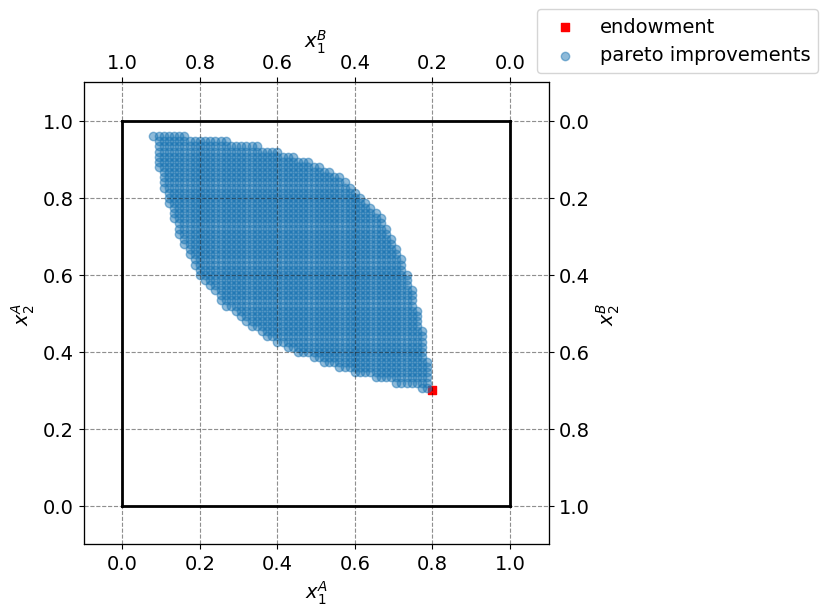

In [5]:
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='red',label='endowment')
ax_A.scatter(x1_possible,x2_possible, alpha=0.5, label='pareto improvements')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True, loc='lower right', bbox_to_anchor=(1.6,1.0));

## 2. <a id='toc2_'></a>[Errors from $p_1 \in \mathcal{P}_1$](#toc0_)

[(0.533333333333333, -0.2666666666666666), (0.47594936708860747, -0.25066666666666654), (0.42409638554216866, -0.23466666666666652), (0.3770114942528735, -0.2186666666666665), (0.334065934065934, -0.2026666666666665)]


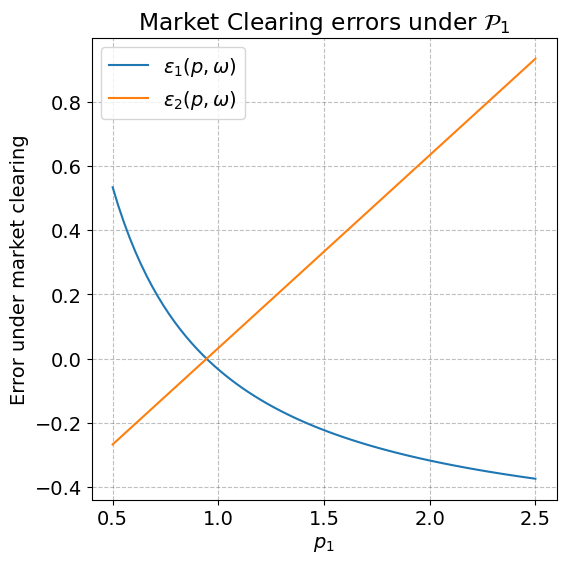

In [7]:
# Initialize empty list
p1 = []

# Fill the list by looping
for i in range(N+1):
    p1.append(0.5 + 2*i/N)

# Initialize empty list
error = []

# Calculate errors (eps1,eps2) using the check_market_clearing func from ExchangeEconomy.py and filling list
for i in p1:
    error.append(model.check_market_clearing(i))

# Print check 
print(error[0:5])

# Unpack tuple list error for plotting 
error1,error2 = zip(*error)

# plot of errors as functions of p1
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_C = fig.add_subplot(1, 1, 1)

ax_C.set_ylabel("Error under market clearing")
ax_C.set_xlabel("$p_1$")
ax_C.set_title("Market Clearing errors under $\mathcal{P}_1$")

ax_C.plot(p1, error1, label = '$\epsilon_1(p,\omega)$')
ax_C.plot(p1, error2, label = '$\epsilon_2(p,\omega)$')
ax_C.legend()

## 3. <a id='toc3_'></a>[Market clearing price](#toc0_)

The market clearing price, is the choice of $p_1$, that make both errors as low as possible, preferably close to zero. From the graph in 2 we can see that this is close to 1, which is determined more precisely in this section. Now, using Walras' law, it is known that if the market for x1 clears with the price vector, the market for x2 also clears, thus we only need to check for one of the errors. 

In [198]:
# In order to use the np.isclose command properly, an array with a lot of small values, all close to zero is initialized as the possible tolerances
posatol = np.arange(1e-20,1,1e-4)

# The best absolute tolerance and the walraseq variable is initiliazed 
best_atol = None
walraseq = None

# Create a nested loop: The outer loop iterates over all the tolerances in posatol
for i in posatol:

    # In order to break in time, the found_match variable is initialized
    found_match = False

    # The inner loop iterates over all the discrete prices in the price vector for p1
    for j in p1:

        # If just one price in the price vector for p1 is accepted as np.isclose at the absolute tolerance i, the match is found
        if np.isclose(model.check_market_clearing(j)[0],0, atol=i):

            # The match is stored in best_atol
            best_atol = i

            # The match then also means that the search is over and the p1 that constitutes the Walraw Equilibrium is found
            walraseq= j

            # The found_match is switched on
            found_match = True
    
    # The outer loop breaks if the match is found
    if found_match == True:
        break

print(f'The price p1 = {walraseq:.2f} constitutes a Walras Equilibrium at the lowest possbile tolerance (for np.isclose), which is {best_atol}')

The price p1 = 0.95 constitutes a Walras Equilibrium at the lowest possbile tolerance (for np.isclose), which is 0.0056


To validate this result, and find the optimal allocations given this price, we can solve the model using the class:

In [8]:
# Alternative solution using Class solver:

model.solve(type='market')

# Save solution to be plottet later
x1A_best_market=model.sol.x1
x2A_best_market=model.sol.x2
U_market = model.sol.u

x1A = 0.373 x2A = 0.704, U_market = 1.058, u_A = 0.569, u_B = 0.489, p = 0.944


## 4. <a id='toc4_'></a>[Assignment 4](#toc0_)

In [10]:
#4a
ua_best = -np.inf
p1bestalloc = None

# Loop over p1 in the price vector
for i in p1:

    # Be sure that the good left over for A is of positive utility since negative good quantities will correspond to a utility value in complex numbers
    if 1-model.demand_B(i)[0] > 0 and 1-model.demand_B(i)[1]>0:

        # Compute the utility for the good left over for A
        ua = model.utility_A(1-model.demand_B(i)[0], 1-model.demand_B(i)[1])
        
        # Update ua_best if ua is of higher value
        if ua > ua_best:
            ua_best = ua
            p1bestalloc = i

print(f'A chooses the price p1 = {p1bestalloc:.2f} to maximize her own utility, which is then {ua_best:.2f}')
print(f'The allocation is then: x1A = {model.demand_A(p1bestalloc)[0]:.2f} and x2A = {model.demand_A(p1bestalloc)[1]:.2f}')

#4b
ua_best_any = -np.inf
p1bestalloc_any = None

# Loop over any price between 0 and 100
for i in np.arange(0,100,1e-3):

    # Be sure that the good left over for A is of positive utility since negative good quantities will correspond to a utility value in complex numbers
    if 1-model.demand_B(i)[0] > 0 and 1-model.demand_B(i)[1]>0:

        # Compute the utility for the good left over for A
        ua = model.utility_A(1-model.demand_B(i)[0], 1-model.demand_B(i)[1])
        
        # Update ua_best if ua is of higher value
        if ua > ua_best_any:
            ua_best_any = ua
            p1bestalloc_any = i

print(f'If A can choose any p1>0, A chooses the price p1 = {p1bestalloc_any:.2f} to maximize her own utility, which is then {ua_best_any:.2f}')
print(f'The allocation is then: x1A = {model.demand_A(p1bestalloc_any)[0]:.2f} and x2A = {model.demand_A(p1bestalloc_any)[1]:.2f}')


A chooses the price p1 = 1.89 to maximize her own utility, which is then 0.63
The allocation is then: x1A = 0.32 and x2A = 1.21
If A can choose any p1>0, A chooses the price p1 = 1.90 to maximize her own utility, which is then 0.63
The allocation is then: x1A = 0.32 and x2A = 1.21


## 5. <a id='toc5_'></a>[Individual optimization](#toc0_)

In this part of the assignment, agent A maximizes their own utility under the restriction that agent B is not worse of than in the initial endowment. The prices are taken as given, and allocation is defined as a bundle of goods.

$[(x_1^A,x_2^A),(x_1^B,x_2^B)]$

In 5.1 the problem, is for A to maximize their utility by choosing $(x_1^A, x_2^A)$, given prices, under the set of possible pareto optimal bundles in $C$. 

While in 5.2 we disregard the set $C$, but only in the sense that we expand the possible allocations to be (close to) infinitely large between 0 and 1, effectively setting N in $\mathcal{C}$ to a large number. Agent A maximizes their utility under this new constraint, but still while agent B has to be atleast as good off as their initial endownment.  


### 5.1. <a id='toc5_1_'></a>[Optimizing under C](#toc0_)

In [14]:
# Agent A optimizes utility of x1A, x2A under the set C

# Model params (not needed)

alpha = 1/3 
beta = 1-alpha 

# Brute force initial conditions
uAmax = -np.inf
x1best = -np.inf
x2best = -np.inf

# loops
for x1 in x1_possible:
    for x2 in x2_possible:
        uAnew = model.utility_A(x1,x2)
        if model.utility_A(x1,x2) > uAmax and model.utility_B(1-x1,1-x2) >= model.utility_B(1-par.w1A,1-par.w2A):
            uAmax = uAnew
            x1best = x1 
            x2best = x2

#Print the solution
print(f'Utility A max = {uAmax:.3f}: (x1A,x2A) = ({x1best:.3f},{x2best:.3f})')
print(f'Utility B max = {model.utility_B(1-x1best,1-x2best):.3f}: (x1B,x2B) = ({1-x1best:.3f},{1-x2best:.3f})')

# using a solver 

# sol_case = optimize.minimize(model.utility_A(x1possible, x2possible)) 

Utility A max = 0.742: (x1A,x2A) = (0.560,0.853)
Utility B max = 0.305: (x1B,x2B) = (0.440,0.147)


### 5.2. <a id='toc5_2_'></a>[Optimizing over the infinite set between 0 and 1](#toc0_)

As said, this is an almost identical problem, the only change, is x1A, x2A exist on the real axis in [0:1] - we simulate this by setting N to 2000. 
Thus if N was sufficiently large in 5.1, the same solution should appear, if not, the opposite. We do in fact get a only marginal higher utility for A, indicating that N was sufficiently large in 5.1 

In [15]:
# Agent A optimizes utility under no further restrictions

# Using brute force again

# Setting high N, simulating large set of numbers in [0:1]
N = 2000

# Set initial conditions
x1possible = np.linspace(0,1,N)
x2possible = np.linspace(0,1,N)
uAmax = -np.inf
x1_best = -np.inf
x2_best = -np.inf

# Just checking utility of B from initial endownments, to make sure. 
print(f'$u^B(w1B,w2B)$ = {model.utility_B(1-par.w1A, 1-par.w2A):.3f}')

# similar loop as 5.1 
for x1A in x1possible:
    for x2A in x2possible:
        uAnew = model.utility_A(x1A,x2A)
        if model.utility_A(x1A,x2A) > uAmax and model.utility_B(1-x1A,1-x2A) >= model.utility_B(1-par.w1A,1-par.w2A):
            uAmax = uAnew
            x1_best = x1A 
            x2_best = x2A

# Print the solution
print(f'Utility A max = {uAmax:.3f}: (x1A,x2A) = ({x1_best:.3f},{x2_best:.3f})')
print(f'Utility B max = {model.utility_B(1-x1_best,1-x2_best):.3f}: (x1B,x2B) = ({1-x1_best:.3f},{1-x2_best:.3f})')

$u^B(w1B,w2B)$ = 0.304
Utility A max = 0.743: (x1A,x2A) = (0.578,0.843)
Utility B max = 0.304: (x1B,x2B) = (0.422,0.157)


The results of 5.2 hints at a minor pareto improvement, suggesting that the original set had enough elements between 0 and 1 to be precise. To validate this solution, we run the class solver again, this time specifying the type as marketmaker ('mm'):

In [203]:
# Alternative using solver:

model.solve(type='mm')

x1A = 0.576 x2A = 0.844, U_mm = 0.743, u_A = 0.743, u_B = 0.304


## 6. <a id='toc6_'></a>[Assignment 6](#toc0_)

# 6.1 Social planner optimization  

The social planner choses A and B's consumption to maximate aggregate utility, given the supply available for consumption (the initial endowments). Code for solving the problem is contained in the ExchangeEconomy.py file.

In [204]:
model.solve()

x1A = 0.333 x2A = 0.667, U_central = 1.058, u_A = 0.529, u_B = 0.529


# 6.2 Illustration of results

To display the results, we plot each allocation pair in the same edgeworth box as from assignment 1.

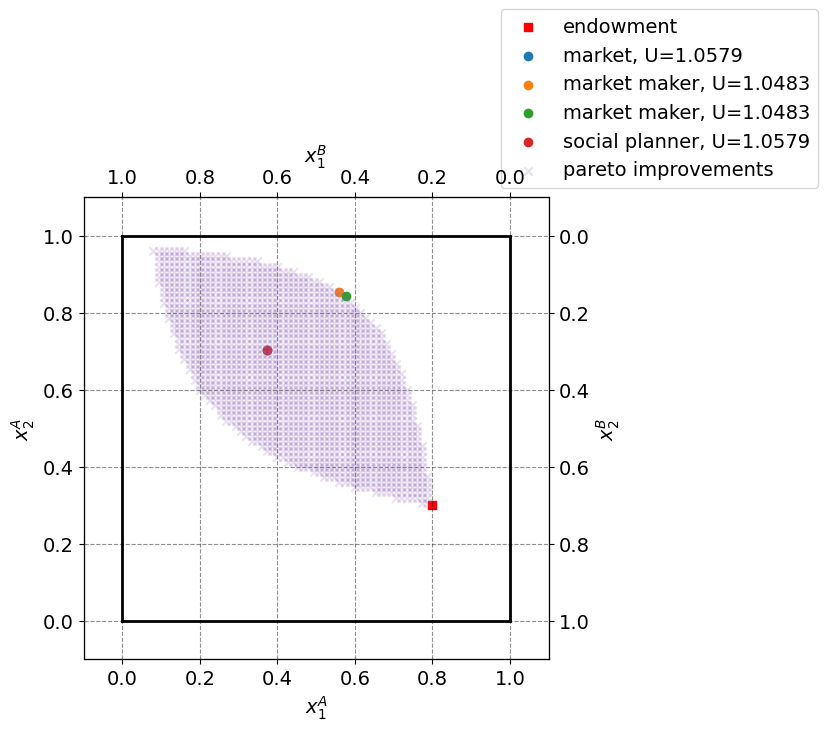

In [16]:
# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(model.par.w1A,model.par.w2A,marker='s',color='red',label='endowment')
ax_A.scatter(x1A_best_market,x2A_best_market, label=f'market, U={U_market:.4f}')
ax_A.scatter(x1best,x2best, label=f'market maker, U={uAmax+model.utility_B(1-x1best,1-x2best):.4f}')
ax_A.scatter(x1_best,x2_best, label=f'market maker, U={uAmax+model.utility_B(1-x1best,1-x2best):.4f}')
ax_A.scatter(model.sol.x1,model.sol.x2, label=f'social planner, U={model.sol.u:.4f}')
ax_A.scatter(x1_possible,x2_possible, alpha=0.2, marker='x', label='pareto improvements')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True, loc='lower right', bbox_to_anchor=(1.6,1.0));

Both the market, social planner and market maker solutions consumer A is allocated more of good 2 and less of good 1, relative to their initial endowment, while for consumer B, the opposite is the case. This makes sense, given that the choice of model parameters where $\alpha=\frac{1}{3}$ and $\beta=\frac{2}{3}$, making consumer A prefer good 2, and consumer B prefer good 1.

The market maker solutions stand out by being positioned on the upper(right) edge of the realm of pareto improvements given the initial endowments. This represents cases where consumer B's allocations is as limited as possible, without their utility being worse than at the start. For the other two solutions, the allocations are more evenly distributed, which leads to more efficient outcomes (given aggregate utility). The market solution allocates less of each good to consumer B than the social planner solution, as it places more weight on the initial endowment, while the social planner solution allocates the goods evenly such that $x^A_1+x^A_2 =x^B_1+x^B_2$.

In [17]:
print('Central planner solution:')
model.solve(type='central')
print('A is market maker solution:')
model.solve(type='mm')
print('Market equilibrium:')
model.solve(type='market')

Central planner solution:
x1A = 0.333 x2A = 0.667, U_central = 1.058, u_A = 0.529, u_B = 0.529
A is market maker solution:
x1A = 0.576 x2A = 0.844, U_mm = 0.743, u_A = 0.743, u_B = 0.304
Market equilibrium:
x1A = 0.373 x2A = 0.704, U_market = 1.058, u_A = 0.569, u_B = 0.489, p = 0.944


## 7. <a id='toc7_'></a>[$W$](#toc0_)

This assignment will illustrate a set $W$, using python psuedo rng. 

$W=\{(\omega_1^A,\omega_2^A) | \omega_1^A \sim \mathcal{U}(0,1), \omega_2^A \sim \mathcal{U}(0,1)  \}$

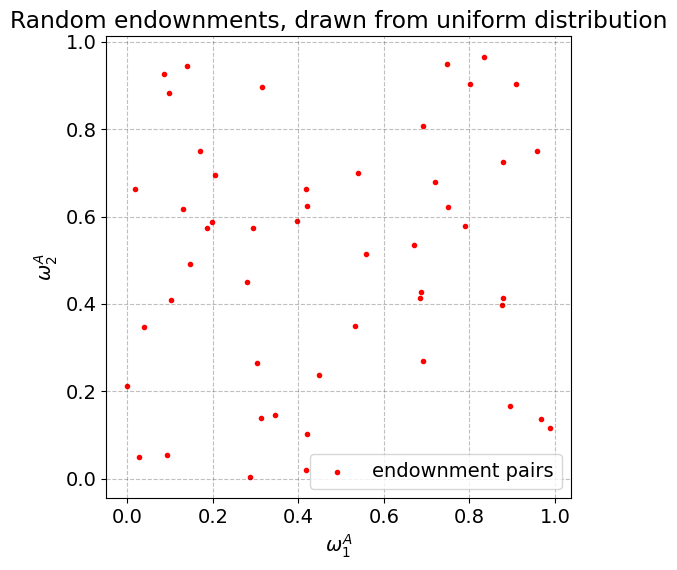

In [18]:
# Set seed for reproduceability 
np.random.seed(1)

# Generate vectors from random draws
w1A = np.random.uniform(low=0,high=1,size=50)
w2A = np.random.uniform(low=0,high=1,size=50)

# Create figure
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_D = fig.add_subplot(1, 1, 1)

ax_D.set_xlabel("$\omega_1^A$")
ax_D.set_ylabel("$\omega_2^A$")
ax_D.set_title("Random endownments, drawn from uniform distribution")

ax_D.scatter(w1A, w2A, label = "endownment pairs", color="red", marker=".")
ax_D.legend()

## 8. <a id='toc8_'></a>[Market equilibrium for each $\omega^A \in \mathcal{W}$](#toc0_)

In [19]:
equlibriums = []

for i in range(len(w1A)):
    w1A_val = w1A[i]
    w2A_val = w2A[i]
    print(f'Iteration {i+1}: w1A = {w1A_val}, w2A = {w2A_val}')
    model.par.w1A = w1A_val
    model.par.w2A = w2A_val
    model.solve(type='market')
    
    equlibriums.append((model.sol.x1, model.sol.x2))
    
    print(f'Iteration {i+1}: w1A = {w1A_val}, w2A = {w2A_val}')

# Unpack the equilibrium results
x1A_w, x2A_w = zip(*equlibriums)

# Reset model parameters to orignial:
model.par.w1A = 0.8
model.par.w2A = 0.3

Iteration 1: w1A = 0.417022004702574, w2A = 0.019366957870297075
x1A = 0.144 x2A = 0.402, U_market = 1.045, u_A = 0.285, u_B = 0.760, p = 1.398
Iteration 1: w1A = 0.417022004702574, w2A = 0.019366957870297075
Iteration 2: w1A = 0.7203244934421581, w2A = 0.678835532939891
x1A = 0.535 x2A = 0.821, U_market = 1.050, u_A = 0.712, u_B = 0.338, p = 0.768
Iteration 2: w1A = 0.7203244934421581, w2A = 0.678835532939891
Iteration 3: w1A = 0.00011437481734488664, w2A = 0.21162811600005904
x1A = 0.039 x2A = 0.141, U_market = 1.018, u_A = 0.092, u_B = 0.925, p = 1.788
Iteration 3: w1A = 0.00011437481734488664, w2A = 0.21162811600005904
Iteration 4: w1A = 0.30233257263183977, w2A = 0.2655466593722262
x1A = 0.167 x2A = 0.445, U_market = 1.049, u_A = 0.321, u_B = 0.727, p = 1.332
Iteration 4: w1A = 0.30233257263183977, w2A = 0.2655466593722262
Iteration 5: w1A = 0.14675589081711304, w2A = 0.4915731592803383
x1A = 0.173 x2A = 0.456, U_market = 1.049, u_A = 0.331, u_B = 0.719, p = 1.315
Iteration 5: w1A

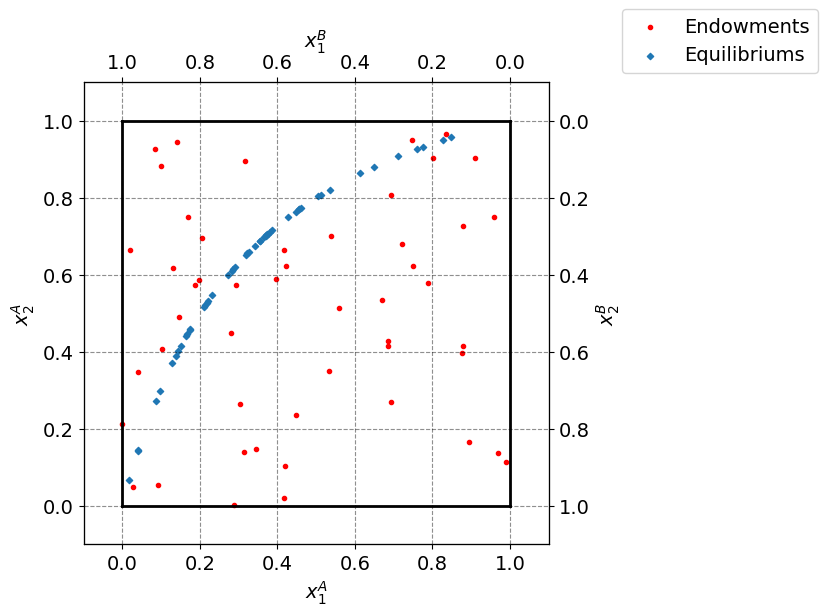

In [20]:
# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(w1A,w2A,marker='.',color='red',label='Endowments')
ax_A.scatter(x1A_w,x2A_w, marker='D', s=10, label=f'Equilibriums')


# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True, loc='lower right', bbox_to_anchor=(1.6,1.0));